In [2]:
# %%
# Pure Samples to generate:
# Silica (Sand): 97% SiO2, 2% Al2O3, ~1% Other

# Kaolinite (Clay): 46.5% SiO2, 39.5% Al2O3, 14.0% H2O
# Smectite (Clay): 66.7% SiO2, 28.3% Al2O3, 5.0% H2O
# Montmorillonite (Clay): 43.5% SiO2, 14.5% Al2O3, 1.0% Na2O, 1.1% H2O, 40% Other

# Quartz (Silt): 100% SiO2

# Kaolinite (Silt): 46.5% SiO2, 39.5% Al2O3, 14.0% H2O
# Smectite (Silt): 66.7% SiO2, 28.3% Al2O3, 5.0% H2O
# Chlorite (Silt): 25% SiO2, 20% Al2O3, 19.4% Fe2O3, 18.9% H2O, 11.8% MgO, 4.9% Other

# Mica (Silt): 46.4% SiO2, 38.2% Al2O3, 10.2% H2O, 3.2% Fe2O3, 1.9% Other

# Feldspars (Silt): 68% SiO2, 20% Al2O3, 7% Other, 5% Na2O

# Coconut: 100% C 0.53 g/cm3


# All the possible compounds in the soil
# SiO2, Al2O3, H2O, Na2O, Fe2O3, MgO, Other

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import json

In [4]:
sims_filename = "sims_01.csv"
sims_df = pd.read_csv(sims_filename)
sims_df

,soil_resolution,function,id,filename
0,7x7x7,Si,1000,7x7x7_Si_001000
1,7x7x7,Al,1001,7x7x7_Al_001001
2,7x7x7,H,1002,7x7x7_H_001002
3,7x7x7,Na,1003,7x7x7_Na_001003
4,7x7x7,O,1004,7x7x7_O_001004
5,7x7x7,Fe,1005,7x7x7_Fe_001005
6,7x7x7,Mg,1006,7x7x7_Mg_001006
7,7x7x7,C,1007,7x7x7_C_001007
8,7x7x7,SiO2,1008,7x7x7_SiO2_001008
9,7x7x7,Al2O3,1009,7x7x7_Al2O3_001009


In [5]:
pickle_files = 'specs/'+sims_df['filename']+'.pkl'
soil_resolutions = sims_df['soil_resolution']
res_info_files = 'ResInfo/res_info_'+soil_resolutions+'.json'
res_info_files

0     ResInfo/res_info_7x7x7.json
1     ResInfo/res_info_7x7x7.json
2     ResInfo/res_info_7x7x7.json
3     ResInfo/res_info_7x7x7.json
4     ResInfo/res_info_7x7x7.json
5     ResInfo/res_info_7x7x7.json
6     ResInfo/res_info_7x7x7.json
7     ResInfo/res_info_7x7x7.json
8     ResInfo/res_info_7x7x7.json
9     ResInfo/res_info_7x7x7.json
10    ResInfo/res_info_7x7x7.json
11    ResInfo/res_info_7x7x7.json
12    ResInfo/res_info_7x7x7.json
13    ResInfo/res_info_7x7x7.json
14    ResInfo/res_info_7x7x7.json
15    ResInfo/res_info_7x7x7.json
16    ResInfo/res_info_7x7x7.json
17    ResInfo/res_info_7x7x7.json
18    ResInfo/res_info_7x7x7.json
19    ResInfo/res_info_7x7x7.json
20    ResInfo/res_info_7x7x7.json
21    ResInfo/res_info_7x7x7.json
22    ResInfo/res_info_7x7x7.json
Name: soil_resolution, dtype: object

In [6]:
res_infos = [json.load(open(res_info_file, 'r')) for res_info_file in res_info_files]
detector_tally_idss = [[int(r) for r in res_info['detector_tally_ids']] for res_info in res_infos]
detector_tally_idss[0]

[808, 818, 828, 834, 836, 844, 846]

In [7]:
tally_t = 1
tally_data = [pickle.load(open(pickle_file, 'rb')) for pickle_file in pickle_files]
tally_binss = [td[0] for td in tally_data]
tally_spetra = [td[1] for td in tally_data]
detector_bins = [bins[tally_t][-2] for bins in tally_binss]
detector_spectra = [spec[tally_t] for spec in tally_spetra]

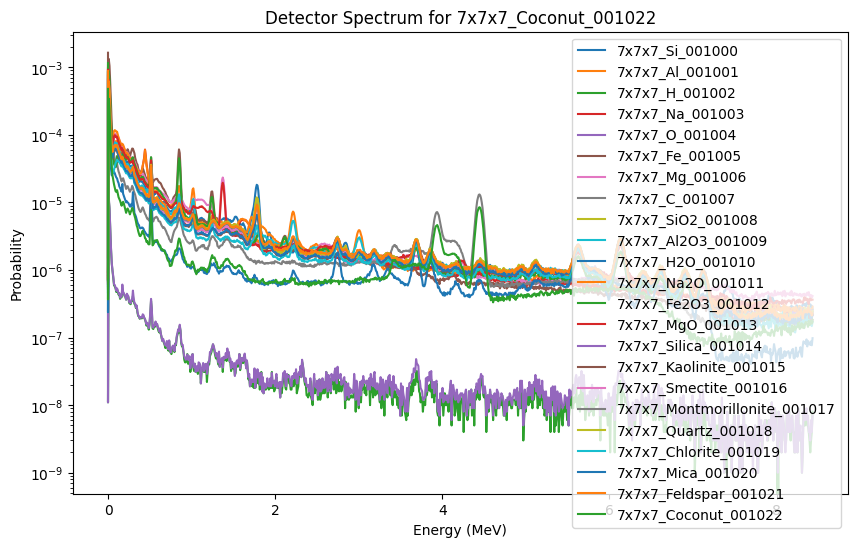

In [8]:
plt.figure(figsize=(10, 6))
for i, detector_spectrum in enumerate(detector_spectra):
    detector_energy_bins = detector_bins[i]
    plt.plot(detector_energy_bins, detector_spectrum.flatten(), label=sims_df['filename'][i])
plt.xlabel('Energy (MeV)')
plt.ylabel('Probability')
plt.title('Detector Spectrum for ' + sims_df['filename'][i])
plt.legend()
plt.yscale('log')
plt.show()

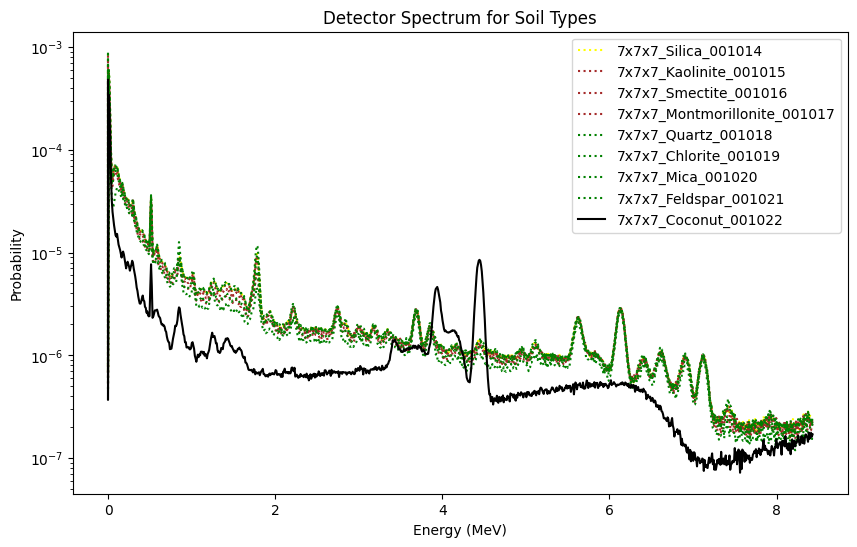

In [9]:
clay_functions = ['Kaolinite', 'Smectite', 'Montmorillonite']
clay_is = [i for i, name in enumerate(sims_df['filename']) if any(clay in name for clay in clay_functions)]

silt_functions = ['Quartz', 'Kaolinite', 'Chlorite', 'Mica', 'Smectite', 'Feldspar']
silt_is = [i for i, name in enumerate(sims_df['filename']) if any(silt in name for silt in silt_functions)]

sand_functions = ['Silica']
sand_is = [i for i, name in enumerate(sims_df['filename']) if any(sand in name for sand in sand_functions)]

carbon_is = [i for i, name in enumerate(sims_df['filename']) if 'Coconut' in name]
plt.figure(figsize=(10, 6))
for i, detector_spectrum in enumerate(detector_spectra):
    detector_energy_bins = detector_bins[i]
    if i in clay_is:
        plt.plot(detector_energy_bins, detector_spectrum.flatten(), label=sims_df['filename'][i], color='brown', linestyle='dotted')
    elif i in silt_is:
        plt.plot(detector_energy_bins, detector_spectrum.flatten(), label=sims_df['filename'][i], color='green', linestyle='dotted')
    elif i in sand_is:
        plt.plot(detector_energy_bins, detector_spectrum.flatten(), label=sims_df['filename'][i], color='yellow', linestyle='dotted')
    elif i in carbon_is:
        plt.plot(detector_energy_bins, detector_spectrum.flatten(), label=sims_df['filename'][i], color='black')
plt.xlabel('Energy (MeV)')
plt.ylabel('Probability')
plt.title('Detector Spectrum for Soil Types')
plt.legend()
plt.yscale('log')
# plt.ylim(1e-6, 1e-5)
plt.show()

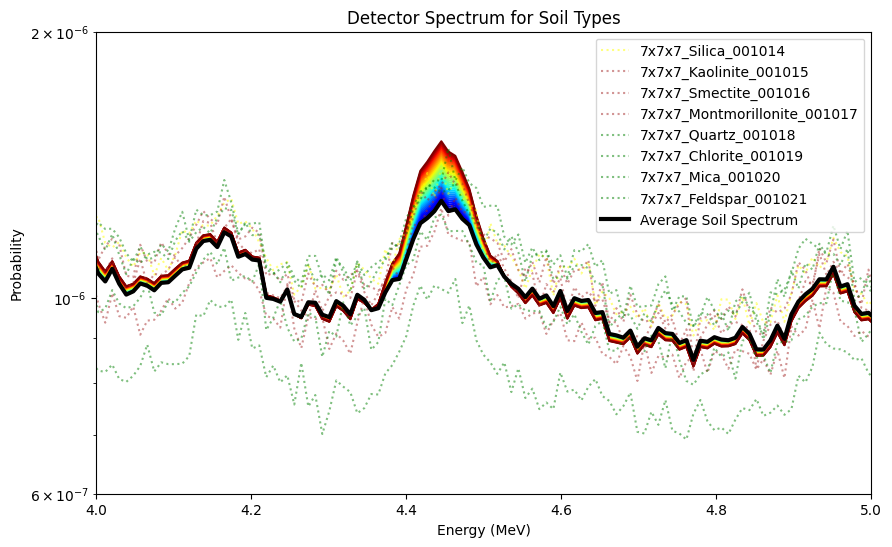

In [14]:
clay_functions = ['Kaolinite', 'Smectite', 'Montmorillonite']
clay_is = [i for i, name in enumerate(sims_df['filename']) if any(clay in name for clay in clay_functions)]

silt_functions = ['Quartz', 'Kaolinite', 'Chlorite', 'Mica', 'Smectite', 'Feldspar']
silt_is = [i for i, name in enumerate(sims_df['filename']) if any(silt in name for silt in silt_functions)]

sand_functions = ['Silica']
sand_is = [i for i, name in enumerate(sims_df['filename']) if any(sand in name for sand in sand_functions)]

carbon_is = [i for i, name in enumerate(sims_df['filename']) if 'Coconut' in name]

soil_spectra_is = clay_is + silt_is + sand_is

avg_soil_spectrum = np.mean([detector_spectra[i] for i in soil_spectra_is], axis=0)

plt.figure(figsize=(10, 6))

carbon_levels = np.linspace(0, .03, 31, endpoint=True)
for carbon_level in carbon_levels:

    plt.plot(detector_energy_bins, (1-carbon_level)*avg_soil_spectrum.flatten()+carbon_level*detector_spectrum.flatten(), color=plt.cm.jet(carbon_level/np.max(carbon_levels)), linestyle='solid')

for i, detector_spectrum in enumerate(detector_spectra):
    detector_energy_bins = detector_bins[i]
    if i in clay_is:
        plt.plot(detector_energy_bins, detector_spectrum.flatten(), label=sims_df['filename'][i], color='brown', linestyle='dotted', alpha=0.5)
    elif i in silt_is:
        plt.plot(detector_energy_bins, detector_spectrum.flatten(), label=sims_df['filename'][i], color='green', linestyle='dotted', alpha=0.5)
    elif i in sand_is:
        plt.plot(detector_energy_bins, detector_spectrum.flatten(), label=sims_df['filename'][i], color='yellow', linestyle='dotted', alpha=0.5)

plt.plot(detector_bins[0], avg_soil_spectrum.flatten(), label='Average Soil Spectrum', color='black', linestyle='solid', linewidth=3)
plt.xlabel('Energy (MeV)')
plt.ylabel('Probability')
plt.title('Detector Spectrum for Soil Types')
plt.legend()
plt.yscale('log')
plt.ylim(6e-7, 2e-6)
plt.xlim(4, 5)
plt.show()


In [11]:
carbon_levels

array([0.   , 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008,
       0.009, 0.01 , 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017,
       0.018, 0.019, 0.02 , 0.021, 0.022, 0.023, 0.024, 0.025, 0.026,
       0.027, 0.028, 0.029, 0.03 ])

In [12]:
plt.cm.jet(carbon_level/np.max(carbon_level))

(np.float64(0.5), np.float64(0.0), np.float64(0.0), np.float64(1.0))

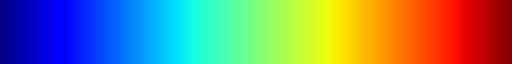

In [13]:
plt.cm.jet